In [1]:
import autograd.numpy as np
import autograd.numpy.random as npr

import pandas as pd
import cst
import pyaldata

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
%matplotlib inline

import seaborn as sns
sns.set_style("ticks")
sns.set_context("talk")

In [46]:
lambda_to_use = 3.3
delay = 250
trial_length = 6
dt = 1e-3
num_timepoints = int(trial_length/dt)
scale = 15
hand_pos = np.zeros((num_timepoints))
cursor_pos = np.zeros((num_timepoints))
hand_pos[:delay] = np.repeat(5*npr.rand(1),delay)

for timepoint in range(1,num_timepoints):
    cursor_vel = lambda_to_use*(cursor_pos[timepoint-1]+hand_pos[timepoint-1])
    cursor_pos[timepoint] = dt*cursor_vel+cursor_pos[timepoint-1]
    if timepoint>=delay:
        hand_pos[timepoint] = -1.1*cursor_pos[timepoint-delay]
    else:
        hand_pos[timepoint] = hand_pos[timepoint-1]

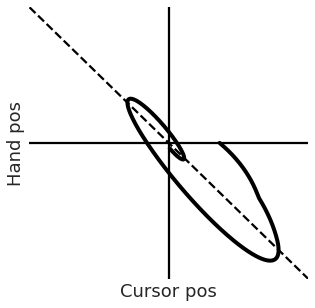

In [53]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
# ax[0].plot([0,6],[0,0],'-k')
# ax[0].set_xlim(0,6)
# ax[0].set_ylim(-scale,scale)
# ax[0].set_yticks([-30,30])
# ax[0].set_xticks([])
# ax[0].set_xlabel('Time (s)')
# ax[0].set_ylabel('Cursor or hand position')
# sns.despine(ax=ax[0],left=False,bottom=True,trim=True)
ax.set_xlim(-scale,scale)
ax.set_ylim(-scale,scale)
ax.set_xticks([])
ax.set_yticks([])
ax.yaxis.tick_right()
ax.set_xlabel('Cursor pos')
ax.set_ylabel('Hand pos')
sns.despine(ax=ax,left=True,bottom=True)
ax.plot([-60,60],[60,-60],'--k')
ax.plot([0,0],[-60,60],'-k')
ax.plot([-60,60],[0,0],'-k')

# cursor_l, = ax[0].plot([],[],'-b')
# hand_l, = ax[0].plot([],[],'-r')
sm_l, = ax.plot([],[],'k',lw=4)

def animate_smplot(i):
#     cursor_l.set_data(np.arange(delay,i)*dt,cursor_pos[delay:i])
#     hand_l.set_data(np.arange(delay,i)*dt,hand_pos[delay:i])
    sm_l.set_data(cursor_pos[delay:i],hand_pos[delay:i])
    
ani = mpl.animation.FuncAnimation(
    fig=fig,
    func=animate_smplot,
    interval=30,
    frames=range(delay,num_timepoints,30),
    repeat=False
)

# from IPython.display import HTML
# HTML(ani.to_jshtml())

anim_savename = r'/mnt/c/Users/Raeed/Wiki/professional/cabinet/talks/20210420-ncm2021/assets/smplot_delay_anim.mp4'
writer = mpl.animation.FFMpegWriter(fps=30) 
ani.save(anim_savename, writer=writer)